# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("diabetes.csv")
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

<AxesSubplot: ylabel='Count'>

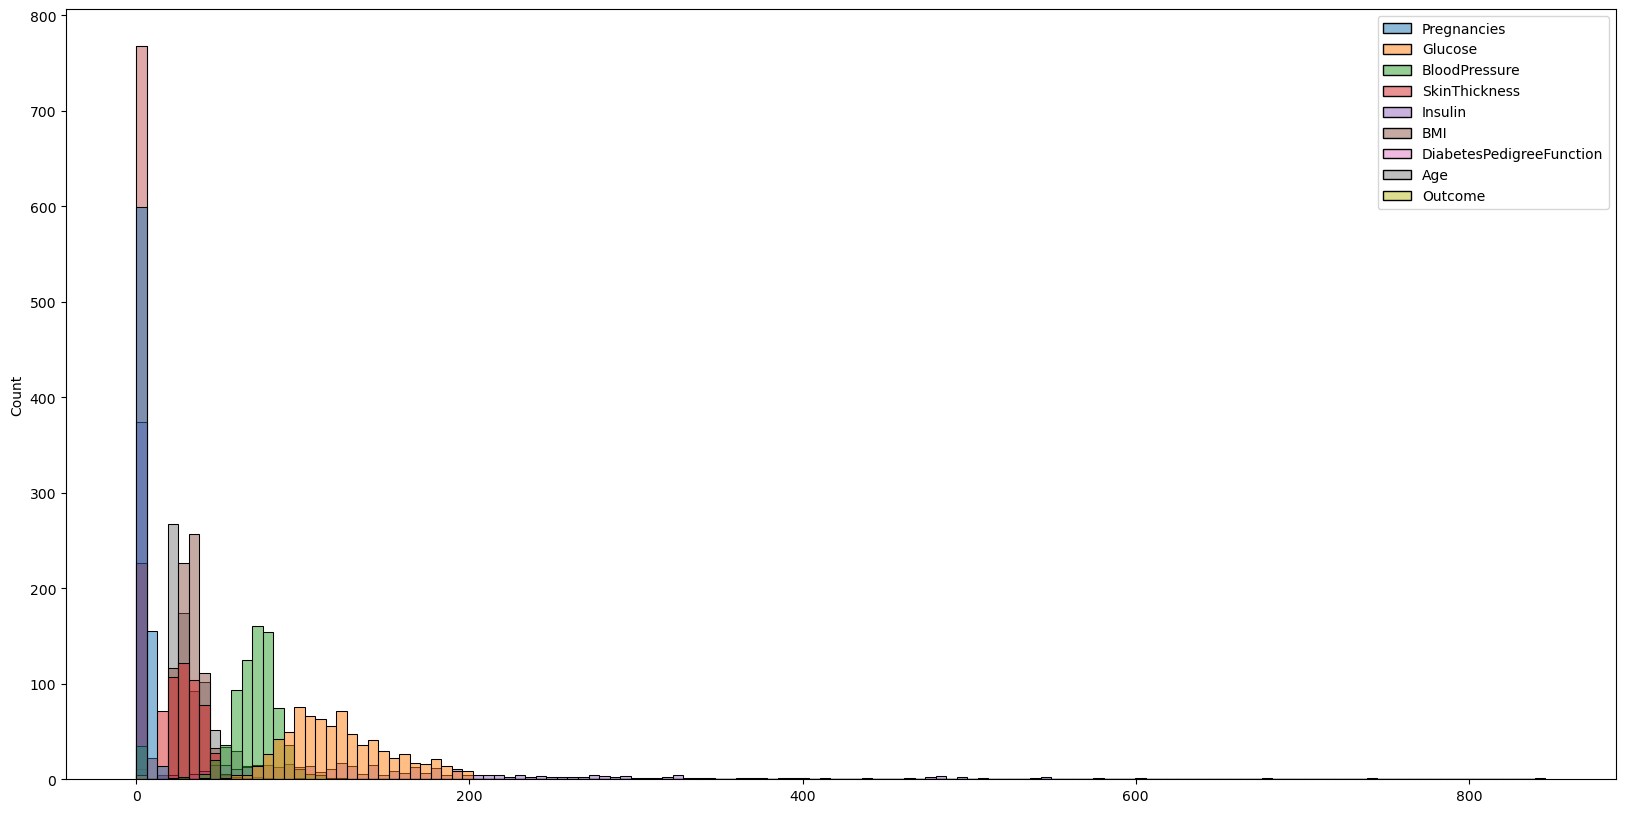

In [16]:
plt.figure(figsize=(20,10))
sns.histplot(data=df)

# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
## here for misconcept is true like bmi can not be zero 
data["BMI"] = data["BMI"].replace(0,data["BMI"].mean())
data["BloodPressure"] = data["BloodPressure"].replace(0,data["BloodPressure"].mean())
data["Glucose"] = data["Glucose"].replace(0,data["Glucose"].mean())
data["Insulin"] = data["Insulin"].replace(0,data["Insulin"].mean())
data["SkinThickness"] = data["SkinThickness"].replace(0,data["SkinThickness"].mean())

In [26]:
df["BMI"] = df["BMI"].replace(0,df["BMI"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["Glucose"] = df["Glucose"].replace(0,df["Glucose"].mean())
df["Insulin"] = df["Insulin"].replace(0,df["Insulin"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0,df["SkinThickness"].mean())

# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [31]:
x = df.iloc[:,:-1]
y = df["Outcome"]

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.25,random_state=42)


# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()

parameter = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [60]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [61]:
clf = GridSearchCV(regressor,param_grid=parameter,cv=5)

In [62]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [63]:
clf.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}

# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [64]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = clf.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

ValueError: Classification metrics can't handle a mix of continuous and binary targets

# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier()

In [65]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

NameError: name 'treeclassifier' is not defined

<Figure size 1500x1000 with 0 Axes>

# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.